<a href="https://colab.research.google.com/github/MadeehaTassadaq/MadeehaTassadaq/blob/main/missing__data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [7]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [8]:
df.shape

(19158, 13)

In [10]:
cols=[i for i in df.columns if df[i].isnull().mean()<0.05 and df[i].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [12]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
7939,0.624,no_enrollment,Graduate,4.0,54.0
898,0.769,Full time course,Graduate,5.0,19.0
6395,0.903,no_enrollment,Phd,20.0,54.0
4401,0.624,no_enrollment,Graduate,0.0,NaN
5353,0.920,no_enrollment,Graduate,20.0,36.0


In [14]:
df['education_level'].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [48]:
df['experience'].value_counts()

,count
experience,
20.0,3434
5.0,1430
4.0,1403
3.0,1354
6.0,1216
2.0,1127
7.0,1028
10.0,985
9.0,980


In [17]:
len(df[cols].dropna())/len(df)*100

89.68577095730244

In [18]:
new_df=df[cols].dropna()

In [21]:
df.shape,new_df.shape

((19158, 13), (17182, 5))

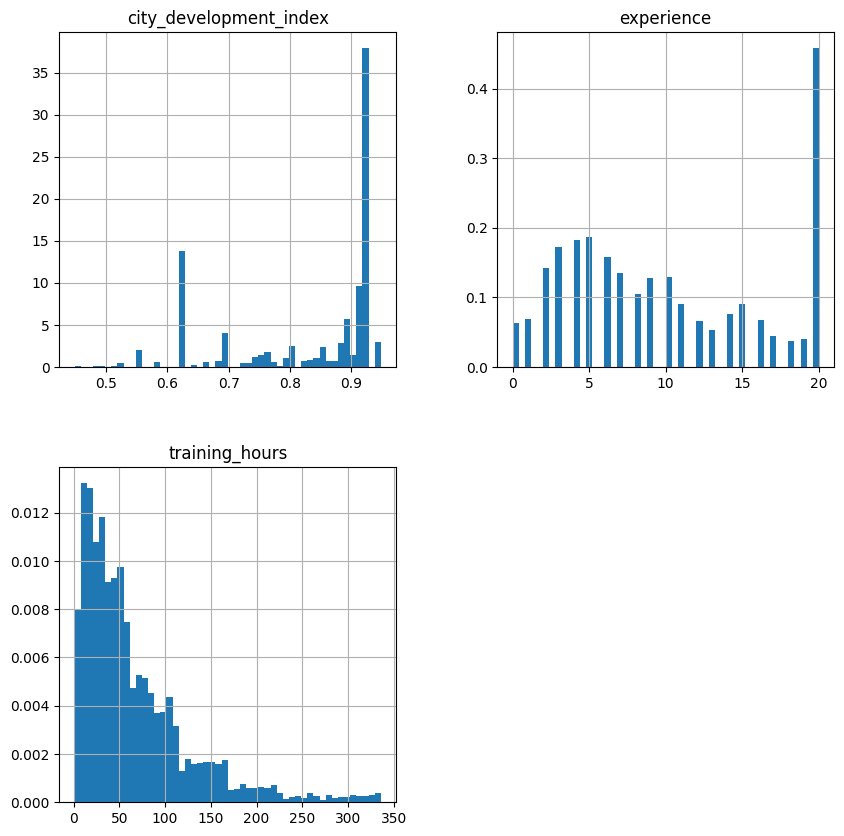

In [25]:
new_df.hist(figsize=(10,10),bins=50,density=True)
plt.show()

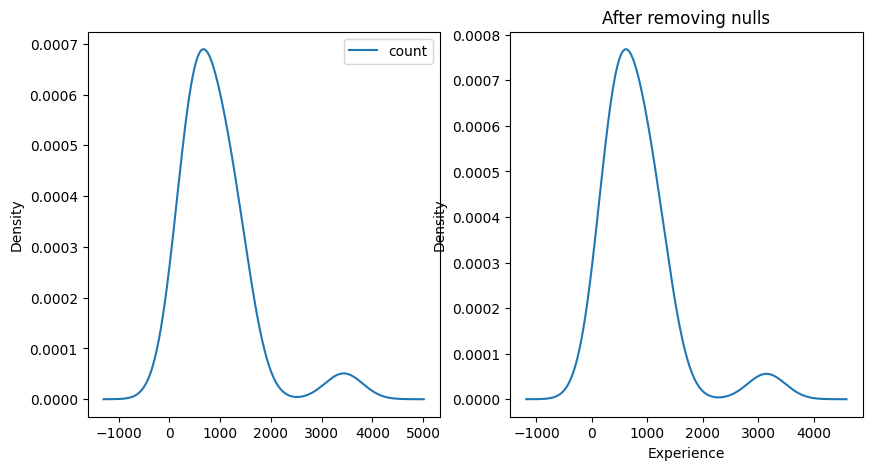

In [41]:
# plotting of data before and after removing nulls
fig,axes =plt.subplots(1,2,figsize=(10,5))
df['experience'].value_counts().plot(kind='density',ax=axes[0],legend=True)
plt.title('Before removing nulls')
plt.xlabel('Experience')
new_df['experience'].value_counts().plot(kind='density',ax=axes[1])
plt.title('After removing nulls')
plt.xlabel('Experience')
plt.show()

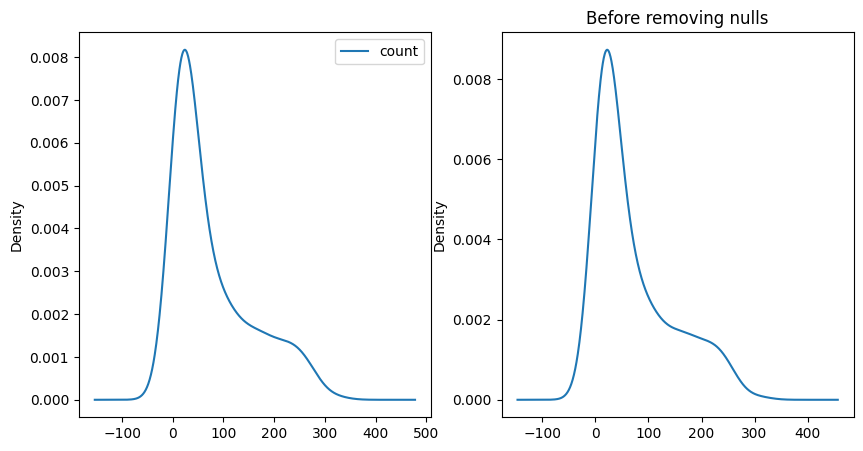

In [44]:
fig,axes =plt.subplots(1,2,figsize=(10,5))
df['training_hours'].value_counts().plot(kind='density',ax=axes[0],legend=True)

new_df['training_hours'].value_counts().plot(kind='density',ax=axes[1])
plt.title('Before removing nulls')
plt.show()


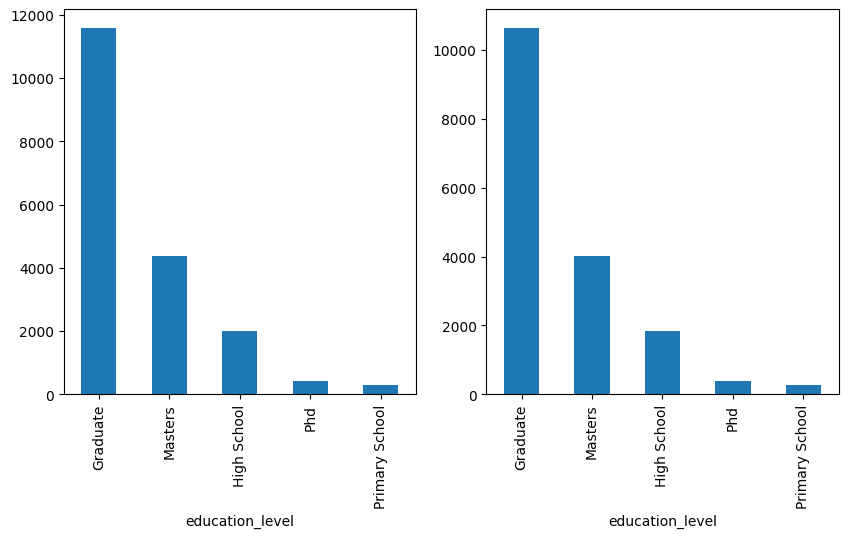

In [54]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
df['education_level'].value_counts().plot(kind='bar',ax=axes[0])
new_df['education_level'].value_counts().plot(kind='bar',ax=axes[1])
plt.show()

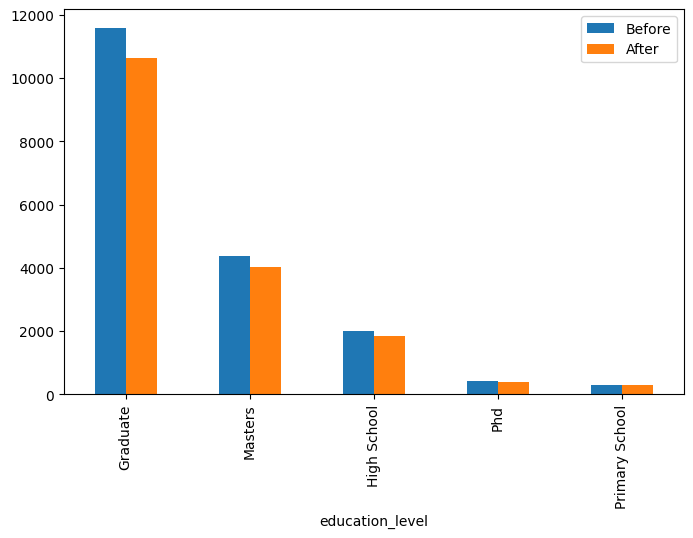

In [65]:
temp=pd.concat([df['education_level'].value_counts(),new_df['education_level'].value_counts()],axis=1)
temp.columns=['Before','After']
temp.plot(kind='bar',figsize=(8,5))
plt.show()

In [67]:
temp.columns=['Before','After']
temp

,Before,After
education_level,,
Graduate,11598,10650
Masters,4361,4022
High School,2017,1845
Phd,414,380
Primary School,308,285


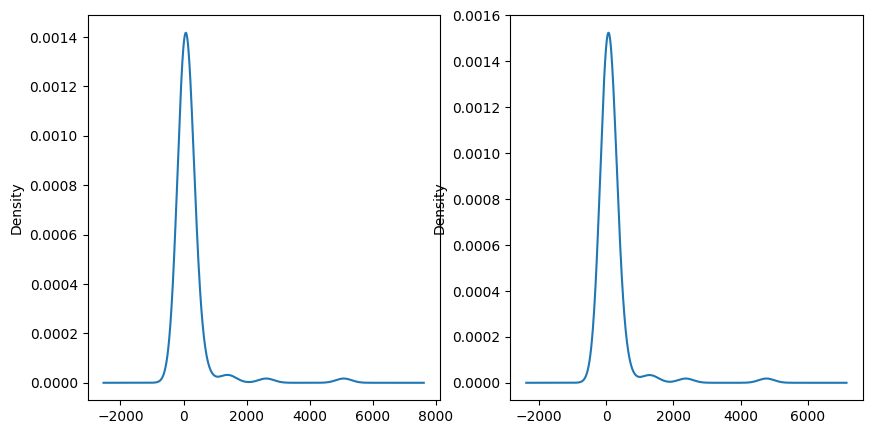

In [56]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
df['city_development_index'].value_counts().plot(kind='density',ax=axes[0])
new_df['city_development_index'].value_counts().plot(kind='density',ax=axes[1])
plt.show()

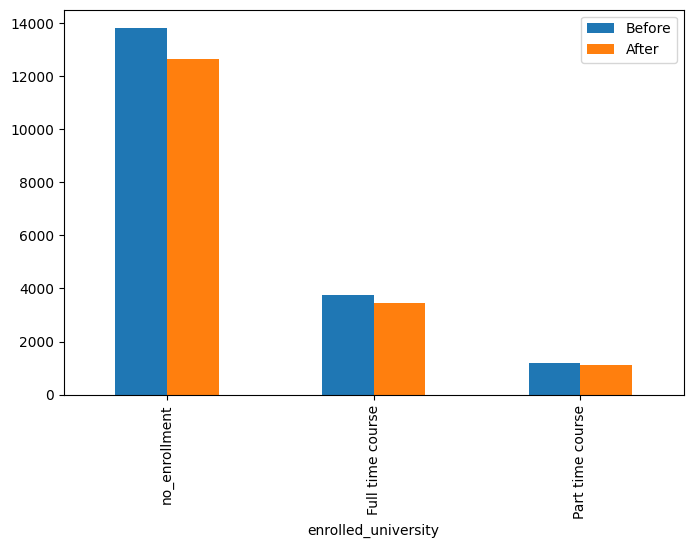

,Before,After
enrolled_university,,
no_enrollment,13817,12632
Full time course,3757,3449
Part time course,1198,1101


In [68]:
temp=pd.concat([df['enrolled_university'].value_counts(),new_df['enrolled_university'].value_counts()],axis=1)
temp.columns=['Before','After']
temp.plot(kind='bar',figsize=(8,5))
plt.show()
temp


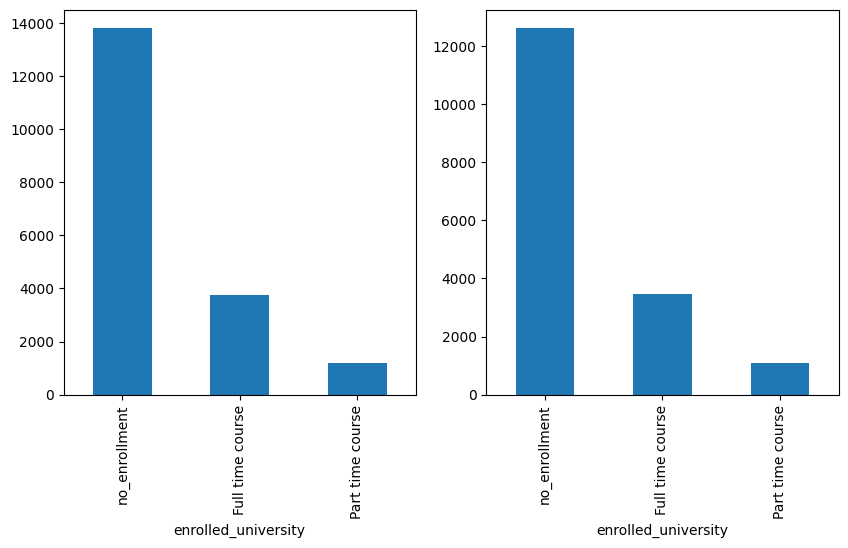

In [58]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
df['enrolled_university'].value_counts().plot(kind='bar',ax=axes[0])
new_df['enrolled_university'].value_counts().plot(kind='bar',ax=axes[1])
plt.show()